In [188]:
import sys
import os

sys.path.append(os.path.abspath("../"))

from src.paths import RAW_DATA_electricity_DIR

In [189]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [190]:
from datetime import datetime, timedelta

import hopsworks
# from hsfs.feature_store import FeatureStore
import pandas as pd
import numpy as np

import src.component.feature_group_config as config
from src.component.feature_store_api import get_feature_store, get_or_create_feature_view
from src.component.feature_group_config import FEATURE_VIEW_METADATA

In [191]:
current_date = pd.to_datetime(datetime.utcnow(),utc=True).floor('h')
current_date

Timestamp('2025-04-12 15:00:00+0000', tz='UTC')

In [192]:
# date = pd.to_datetime('2024-04-05')

In [193]:
# date

In [194]:
import hopsworks 
project = hopsworks.login()
fs = project.get_feature_store(name='mix_featurestore')
fv = fs.get_feature_view('electricity_demand_feature_view', version=1)

2025-04-12 15:33:43,587 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-04-12 15:33:43,589 INFO: Initializing external client
2025-04-12 15:33:43,590 INFO: Base URL: https://c.app.hopsworks.ai:443


2025-04-12 15:33:44,077 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1222815


In [195]:
df = fv.get_batch_data()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.61s) 


In [196]:
df.head()

,date,sub_region_code,demand,temperature_2m
0,2024-04-18 17:00:00+00:00,1,850,13.858500
1,2024-08-10 11:00:00+00:00,8,524,23.908501
2,2024-04-08 19:00:00+00:00,8,505,11.058500
3,2024-09-21 20:00:00+00:00,4,627,13.808500
4,2024-03-08 20:00:00+00:00,1,1235,1.558500


In [197]:
df.tail()

,date,sub_region_code,demand,temperature_2m
96520,2024-12-03 03:00:00+00:00,5,1356,-2.3915
96521,2024-01-15 21:00:00+00:00,10,2213,3.9085
96522,2024-06-21 10:00:00+00:00,1,973,18.6085
96523,2024-03-02 02:00:00+00:00,8,643,1.0585
96524,2024-09-18 23:00:00+00:00,0,1798,17.0585


In [198]:
#load recent batch of data from feature store
from src.component.inference import load_batch_of_features_from_store
# features = load_batch_of_features_from_store(current_date)
features = load_batch_of_features_from_store(current_date)

2025-04-12 15:34:00,170 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-04-12 15:34:00,174 INFO: Initializing external client
2025-04-12 15:34:00,174 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-04-12 15:34:00,641 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1222815


2025-04-12 15:34:01,904 INFO: Feature view already exists, skipping creation.
2025-04-12 15:34:01,905 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-04-12 15:34:01,911 INFO: Initializing external client
2025-04-12 15:34:01,912 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-04-12 15:34:02,354 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1222815
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.42s) 
Dates before filtering:
NaT NaT
Empty DataFrame
Columns: [date, sub_region_code, demand, temperature_2m]
Index: []
Dates after filtering:
NaT NaT
Index([], dtype='int64', name='sub_region_code')
Filtered out sub-regions that do not meet the required 672 records.


In [199]:
features

,demand_previous_672_hour,demand_previous_671_hour,demand_previous_670_hour,demand_previous_669_hour,demand_previous_668_hour,demand_previous_667_hour,demand_previous_666_hour,demand_previous_665_hour,demand_previous_664_hour,demand_previous_663_hour,...,demand_previous_7_hour,demand_previous_6_hour,demand_previous_5_hour,demand_previous_4_hour,demand_previous_3_hour,demand_previous_2_hour,demand_previous_1_hour,temperature_2m,date,sub_region_code


In [200]:
# from src.component.inference import (
#     load_model_from_registry,
#     get_model_predictions
# )

# model = load_model_from_registry()
# predictions = get_model_predictions(model, features)

In [201]:
# predictions['date'] = current_date
# #predictions['seconds'] = predictions['date'].astype('int64') // 10**6
# predictions

In [202]:
# from src.plot import plot_one_sample

# plot_one_sample(
#     example_id=6,
#     features=features,
#     targets=predictions['predicted_demand'],
#     predictions=pd.Series(predictions['predicted_demand'])
# )

In [203]:
# from src.plot import plot_one_sample

# plot_one_sample(
#     example_id=8,
#     features=features,
#     targets=predictions['predicted_demand'],
#     predictions=pd.Series(predictions['predicted_demand'])
# )

In [204]:
# #save predictions to the feature store
# from src.component.feature_store_api import get_feature_store
# import src.component.feature_group_config as config

# # connect to the feature group
# feature_group = get_feature_store().get_or_create_feature_group(
#     name=config.FEATURE_GROUP_MODEL_PREDICTIONS,
#     version=1,
#     description="Predictions generate by our production model",
#     primary_key = ['sub_region_code', 'date'],
#     event_time='date'
# )



In [205]:
# feature_group.insert(predictions, write_options={"wait_for_job": False})

In [206]:
data = df.copy()

In [207]:
df_sub_0 = data[data["sub_region_code"] == 0]
df_sub_0.head()

,date,sub_region_code,demand,temperature_2m
10,2024-10-13 06:00:00+00:00,0,1370,7.2085
22,2024-11-03 03:00:00+00:00,0,1548,9.2585
56,2024-11-25 16:00:00+00:00,0,1870,0.6585
62,2024-10-10 15:00:00+00:00,0,1585,15.3585
64,2024-05-23 18:00:00+00:00,0,1493,16.9585


In [208]:
# drop `date` column
# df_sub_0.drop('seconds', axis=1, inplace=True)

# sort by `pickup_location_id` and `pickup_hour`
df_sub_0.sort_values(by=['date'], inplace=True)
df_sub_0

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,sub_region_code,demand,temperature_2m
16049,2024-01-01 04:00:00+00:00,0,1516,12.2585
20802,2024-01-01 05:00:00+00:00,0,1450,11.8585
20725,2024-01-01 06:00:00+00:00,0,1384,12.0585
75386,2024-01-01 07:00:00+00:00,0,1351,12.3585
42482,2024-01-01 08:00:00+00:00,0,1335,11.8085
...,...,...,...,...
75666,2024-12-31 14:00:00+00:00,0,1912,4.8585
39664,2024-12-31 15:00:00+00:00,0,1926,4.8585
89958,2024-12-31 16:00:00+00:00,0,1942,4.9585
19780,2024-12-31 17:00:00+00:00,0,1952,5.1085


In [209]:
df_sub_0.drop(['sub_region_code', 'temperature_2m'], axis=1, inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [210]:
df_inf = df_sub_0.copy()

In [211]:
df_inf['demand'] = pd.to_numeric(df_inf['demand'])
df_inf['date'] = pd.to_datetime(df_inf['date'])

In [212]:
df_inf = df_inf.set_index('date')

In [213]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8775 entries, 2024-01-01 04:00:00+00:00 to 2024-12-31 18:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   demand  8775 non-null   int64
dtypes: int64(1)
memory usage: 137.1 KB


In [214]:
print(df_inf)

                           demand
date                             
2024-01-01 04:00:00+00:00    1516
2024-01-01 05:00:00+00:00    1450
2024-01-01 06:00:00+00:00    1384
2024-01-01 07:00:00+00:00    1351
2024-01-01 08:00:00+00:00    1335
...                           ...
2024-12-31 14:00:00+00:00    1912
2024-12-31 15:00:00+00:00    1926
2024-12-31 16:00:00+00:00    1942
2024-12-31 17:00:00+00:00    1952
2024-12-31 18:00:00+00:00    1961

[8775 rows x 1 columns]


In [215]:
test_data = df_inf.copy()

In [216]:
test_data.head()

,demand
date,
2024-01-01 04:00:00+00:00,1516
2024-01-01 05:00:00+00:00,1450
2024-01-01 06:00:00+00:00,1384
2024-01-01 07:00:00+00:00,1351
2024-01-01 08:00:00+00:00,1335


In [217]:
test_data.tail()

,demand
date,
2024-12-31 14:00:00+00:00,1912
2024-12-31 15:00:00+00:00,1926
2024-12-31 16:00:00+00:00,1942
2024-12-31 17:00:00+00:00,1952
2024-12-31 18:00:00+00:00,1961


In [218]:
start = "2025-04-05 18:00:00+00:00	"
end = "2025-04-06 18:00:00+00:00"

# Slice the DataFrame using the datetime range
check_data = test_data.loc[start:end]

In [219]:
check_data.iloc[:20]

,demand
date,


In [220]:
start = "2024-01-01 18:00:00+00:00"
end = "2024-04-05 18:00:00+00:00"

# Slice the DataFrame using the datetime range
filtered_df = test_data.loc[start:end]

In [221]:
filtered_df.head()

,demand
date,
2024-01-01 18:00:00+00:00,1563
2024-01-01 19:00:00+00:00,1555
2024-01-01 20:00:00+00:00,1570
2024-01-01 21:00:00+00:00,1603
2024-01-01 22:00:00+00:00,1670


In [222]:
filtered_df.tail()

,demand
date,
2024-04-05 14:00:00+00:00,1506
2024-04-05 15:00:00+00:00,1488
2024-04-05 16:00:00+00:00,1462
2024-04-05 17:00:00+00:00,1449
2024-04-05 18:00:00+00:00,1444


In [223]:
from src.component.inference import (
    load_model_and_scaler_from_registry
)

model, scaler = load_model_and_scaler_from_registry()

2025-04-12 15:34:21,760 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-04-12 15:34:21,766 INFO: Initializing external client
2025-04-12 15:34:21,767 INFO: Base URL: https://c.app.hopsworks.ai:443


2025-04-12 15:34:22,243 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1222815


Downloading: 0.000%|          | 0/6343537 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/218141 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/616 elapsed<00:00 remaining<?

In [245]:
from src.inference_tr import ElectricityDemandPredictor

In [246]:
predictor = ElectricityDemandPredictor(
        model, scaler
    )

In [226]:
# predictor.fit_scaler(filtered_df)

In [275]:
# predictions = predictor.predict_next_n_steps(filtered_df, n_steps=24)

# # Show predictions
# print("Predictions for next 24 hours:")
# for i, pred in enumerate(predictions):
#     print(f"Hour {i+1}: {pred:.2f}")
    
# Generate predictions
predictions_df = predictor.predict_next_n_steps(filtered_df, n_steps=24)

# Show predictions
print("Predictions for next 24 hours:")
for i, (date, row) in enumerate(predictions_df.iterrows()):
    print(f"({date}): {row['demand']:.2f}")

Predictions for next 24 hours:
(2024-04-05 19:00:00+00:00): 1456.50
(2024-04-05 20:00:00+00:00): 1482.58
(2024-04-05 21:00:00+00:00): 1521.14
(2024-04-05 22:00:00+00:00): 1569.42
(2024-04-05 23:00:00+00:00): 1617.03
(2024-04-06 00:00:00+00:00): 1645.07
(2024-04-06 01:00:00+00:00): 1642.58
(2024-04-06 02:00:00+00:00): 1609.01
(2024-04-06 03:00:00+00:00): 1552.87
(2024-04-06 04:00:00+00:00): 1498.73
(2024-04-06 05:00:00+00:00): 1461.25
(2024-04-06 06:00:00+00:00): 1443.46
(2024-04-06 07:00:00+00:00): 1447.22
(2024-04-06 08:00:00+00:00): 1472.61
(2024-04-06 09:00:00+00:00): 1517.08
(2024-04-06 10:00:00+00:00): 1571.93
(2024-04-06 11:00:00+00:00): 1614.46
(2024-04-06 12:00:00+00:00): 1627.75
(2024-04-06 13:00:00+00:00): 1611.35
(2024-04-06 14:00:00+00:00): 1576.26
(2024-04-06 15:00:00+00:00): 1536.59
(2024-04-06 16:00:00+00:00): 1503.45
(2024-04-06 17:00:00+00:00): 1485.01
(2024-04-06 18:00:00+00:00): 1484.74


In [276]:
predictions_df

,demand
date,
2024-04-05 19:00:00+00:00,1456.500058
2024-04-05 20:00:00+00:00,1482.576506
2024-04-05 21:00:00+00:00,1521.136438
2024-04-05 22:00:00+00:00,1569.422822
2024-04-05 23:00:00+00:00,1617.028479
2024-04-06 00:00:00+00:00,1645.071698
2024-04-06 01:00:00+00:00,1642.575116
2024-04-06 02:00:00+00:00,1609.013282
2024-04-06 03:00:00+00:00,1552.865831


In [250]:
start = "2024-04-05 19:00:00+00:00"
end = "2024-04-06 19:00:00+00:00"

# Slice the DataFrame using the datetime 
maybe_df = test_data.loc[start:end]

In [251]:
maybe_df

,demand
date,
2024-04-05 19:00:00+00:00,1410
2024-04-05 20:00:00+00:00,1405
2024-04-05 21:00:00+00:00,1403
2024-04-05 22:00:00+00:00,1431
2024-04-05 23:00:00+00:00,1478
2024-04-06 00:00:00+00:00,1527
2024-04-06 01:00:00+00:00,1580
2024-04-06 02:00:00+00:00,1559
2024-04-06 03:00:00+00:00,1531


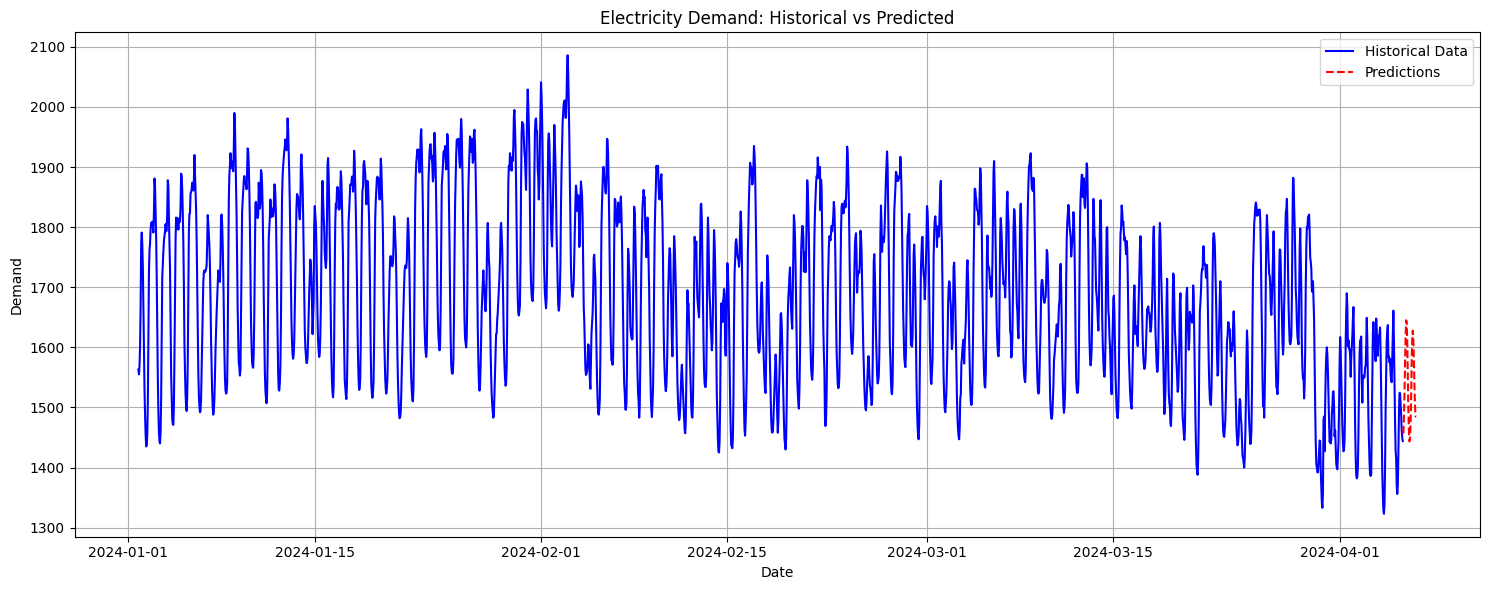

In [252]:
# Plot results
predictor.plot_prediction(filtered_df, predictions_df)

In [277]:
# Reset index so 'date' becomes a column
predictions_df = predictions_df.reset_index()

# Ensure 'date' column is in datetime format
predictions_df['date'] = pd.to_datetime(predictions_df['date'])


In [278]:
predictions_df

,date,demand
0,2024-04-05 19:00:00+00:00,1456.500058
1,2024-04-05 20:00:00+00:00,1482.576506
2,2024-04-05 21:00:00+00:00,1521.136438
3,2024-04-05 22:00:00+00:00,1569.422822
4,2024-04-05 23:00:00+00:00,1617.028479
5,2024-04-06 00:00:00+00:00,1645.071698
6,2024-04-06 01:00:00+00:00,1642.575116
7,2024-04-06 02:00:00+00:00,1609.013282
8,2024-04-06 03:00:00+00:00,1552.865831
9,2024-04-06 04:00:00+00:00,1498.730543


In [279]:
#save predictions to the feature store
from src.component.feature_store_api import get_feature_store
import src.component.feature_group_config as config

# connect to the feature group
feature_group = get_feature_store().get_or_create_feature_group(
    name=config.FEATURE_GROUP_MODEL_PREDICTIONS,
    version=2,
    description="Predictions generate by our production model",
    primary_key = ['date']
)

2025-04-12 16:14:40,097 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-04-12 16:14:40,098 INFO: Initializing external client
2025-04-12 16:14:40,099 INFO: Base URL: https://c.app.hopsworks.ai:443


2025-04-12 16:14:40,557 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1222815


In [280]:
feature_group.insert(predictions_df, write_options={"wait_for_job": False})

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1222815/fs/1209423/fg/1435131


Uploading Dataframe: 100.00% |██████████| Rows 24/24 | Elapsed Time: 00:00 | Remaining Time: 00:00


Launching job: transformer_model_predictions_feature_group_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1222815/jobs/named/transformer_model_predictions_feature_group_1_offline_fg_materialization/executions


(Job('transformer_model_predictions_feature_group_1_offline_fg_materialization', 'SPARK'),
 None)